In [2]:
# !unzip NationalNames.csv.zip

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from tqdm import tqdm


In [4]:
data = pd.read_csv('NationalNames.csv')
data.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [5]:
data = data.drop('Id', axis=1)
data.columns

Index(['Name', 'Year', 'Gender', 'Count'], dtype='object')

In [6]:
data.Name.unique()

array(['Mary', 'Anna', 'Emma', ..., 'Zijun', 'Zilas', 'Zirui'],
      dtype=object)

In [7]:
data['Gender'] = data['Gender'].astype('category').cat.codes

In [8]:
data.head()

,Name,Year,Gender,Count
0,Mary,1880,0,7065
1,Anna,1880,0,2604
2,Emma,1880,0,2003
3,Elizabeth,1880,0,1939
4,Minnie,1880,0,1746


In [9]:
df = data.groupby('Name').mean()['Gender'].reset_index()

In [10]:
df['Gender'] = df['Gender'].astype('int')

In [11]:
df.head()

,Name,Gender
0,Aaban,1
1,Aabha,0
2,Aabid,1
3,Aabriella,0
4,Aadam,1


In [12]:
letters=list(string.ascii_lowercase)
letters

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [13]:
vocab=dict(zip(letters,range(1,27)))
vocab

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [14]:
r_vocab=dict(zip(range(1,27),letters))
r_vocab

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

In [15]:
def word_to_number():
  for i  in tqdm(range(0,df.shape[0])):
    seq=[ vocab[letters.lower()] for letters in df['Name'][i]]
    df['Name'][i]=seq

In [16]:
word_to_number()

  0%|          | 0/93889 [00:00<?, ?it/s]C:\Users\Karan\AppData\Local\Temp\ipykernel_22008\4113809320.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Name'][i]=seq
100%|██████████| 93889/93889 [23:23<00:00, 66.91it/s]  


In [17]:
from keras.layers import Input,Embedding,Dense,LSTM
from keras.models import Model
import tensorflow as tf

In [18]:
from keras.preprocessing.sequence import pad_sequences
x=pad_sequences(df['Name'].values,
                maxlen=10,
                padding='pre')

In [20]:
X=df['Name'].values
Y=df['Gender'].values

In [21]:
name_length=[len(X[i]) for i in range (0, df.shape[0])]

In [22]:
name_length=[len(X[i]) for i in range (0, df.shape[0])]

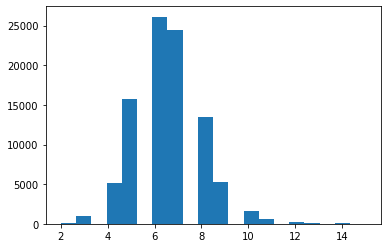

In [23]:
plt.hist(name_length,bins=20)
plt.show()

In [24]:
vocab_size=len(vocab)+1
vocab_size

27

In [25]:
# input layer
inp=Input(shape=(10,))
# embedding layer 
emn=Embedding(input_dim=vocab_size,
              output_dim =26 )(inp)
# lstm layers
lstm1=LSTM(units=32,
           return_sequences=True)(emn)
lstm2=LSTM(units=64)(lstm1)

hidden  = Dense(units=4,activation='relu')(lstm2)


out=Dense(units=1,
          activation='sigmoid')(hidden)

my_model=Model(inputs=inp,
               outputs=out)

In [26]:
my_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 embedding (Embedding)       (None, 10, 5)             135       
                                                                 
 lstm (LSTM)                 (None, 10, 32)            4864      
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 4)                 260       
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 30,096
Trainable params: 30,096
Non-trainable p

In [27]:
my_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [28]:
his=my_model.fit(x,Y,epochs=15, batch_size=512,validation_split=0.2)

Epoch 1/15
147/147 [==============================] - 14s 23ms/step - loss: 0.5917 - acc: 0.6883 - val_loss: 0.5457 - val_acc: 0.7223
Epoch 2/15
147/147 [==============================] - 2s 16ms/step - loss: 0.4710 - acc: 0.7782 - val_loss: 0.4145 - val_acc: 0.8174
Epoch 3/15
147/147 [==============================] - 2s 17ms/step - loss: 0.4204 - acc: 0.8120 - val_loss: 0.4057 - val_acc: 0.8185
Epoch 4/15
147/147 [==============================] - 2s 15ms/step - loss: 0.4115 - acc: 0.8150 - val_loss: 0.3994 - val_acc: 0.8196
Epoch 5/15
147/147 [==============================] - 2s 14ms/step - loss: 0.4069 - acc: 0.8154 - val_loss: 0.3925 - val_acc: 0.8239
Epoch 6/15
147/147 [==============================] - 2s 15ms/step - loss: 0.4024 - acc: 0.8162 - val_loss: 0.3901 - val_acc: 0.8244
Epoch 7/15
147/147 [==============================] - 2s 13ms/step - loss: 0.3994 - acc: 0.8171 - val_loss: 0.3879 - val_acc: 0.8242
Epoch 8/15
147/147 [==============================] - 2s 13ms/step -

C:\Users\Karan\AppData\Local\Temp\ipykernel_22008\1643393085.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


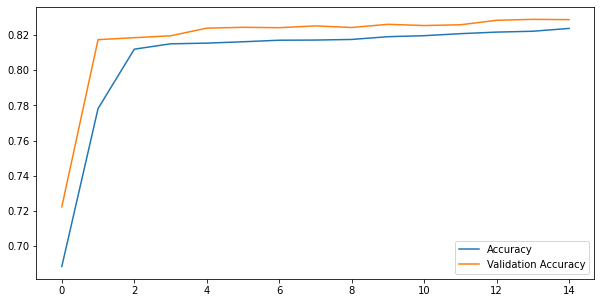

In [29]:
fig, ax=plt.subplots(nrows=1,ncols=1,figsize=(10,5))
ax.plot(his.history['acc'],label='Accuracy')
ax.plot(his.history['val_acc'],label='Validation Accuracy')
ax.legend()
fig.show()

C:\Users\Karan\AppData\Local\Temp\ipykernel_22008\3502202840.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


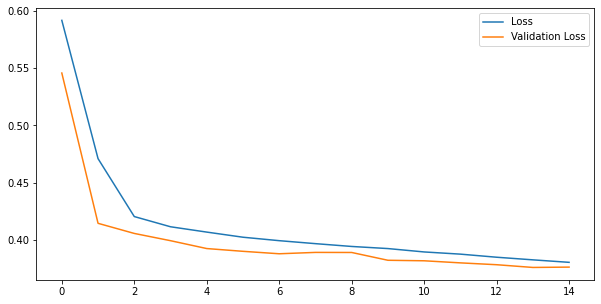

In [30]:
fig, ax=plt.subplots(nrows=1,ncols=1,figsize=(10,5))
ax.plot(his.history['loss'],label='Loss')
ax.plot(his.history['val_loss'],label='Validation Loss')
ax.legend()
fig.show()

In [31]:
def predict_name(name):
  test_name=name.lower()
  seq=[vocab[i] for i in test_name]
  x_test=pad_sequences([seq],10)
  y_pred=my_model.predict(x_test)
  if y_pred < 0.5:
    print("Name is female...")
  else:
    print("Name is male...")

In [33]:
predict_name('Alexander')

Name is male...
